<a href="https://colab.research.google.com/github/Gus-1003/Processamento-Digital-de-Imagem/blob/main/Pratica_2_Sistemas_de_cores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto:

Origem da Ideia: https://medium.com/mlearning-ai/color-shape-and-texture-feature-extraction-using-opencv-cb1feb2dbd73

# Importando Bibliotecas:

In [19]:
# Manipulação de Matrizes
import numpy as np

# Visualização de Gráficos
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

# Manipulação de Imagens
import cv2
from google.colab.patches import cv2_imshow

In [2]:
# importe da biblioteca drive do Google Colab, que é usada para fazer a conexão com o Google Drive.
from google.colab import drive

# o método mount() para montar o Google Drive na sessão atual do Colab. Isso significa que a sessão do Colab agora terá acesso aos arquivos armazenados no Google Drive.
drive.mount('/content/drive/')

''' comando %cd é usado para mudar o diretório atual para a pasta MyDrive dentro do Google Drive, para que os arquivos dentro dessa 
pasta possam ser facilmente acessados pelo código em Python que será executado na sessão do Colab.'''

%cd /content/drive/MyDrive/

Mounted at /content/drive/
/content/drive/MyDrive


# Lendo Arquivo:

In [13]:
file = '/content/drive/MyDrive/Colab Notebooks/Leopardo.jpg'

# carregar a imagem usando o OpenCV
image = cv2.imread(file)

# Tipos de Sistemas de Cores:

## RGB



* **Red**
* **Green**
* **Blue**

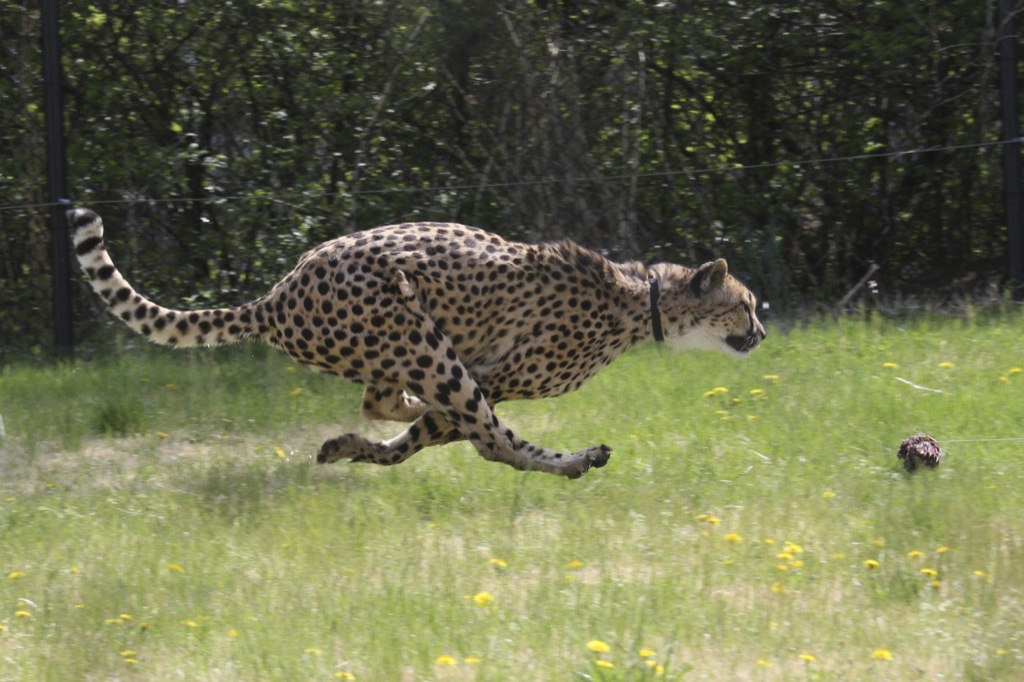

In [14]:
cv2_imshow(image)

## HSV

HSV (matiz-saturação-valor)

* **Matiz :** descreve o comprimento de onda dominante e é o canal para especificar a cor
* **Saturação :** descreve a pureza/tons do matiz/cor
* **Valor :** descreve a intensidade da cor

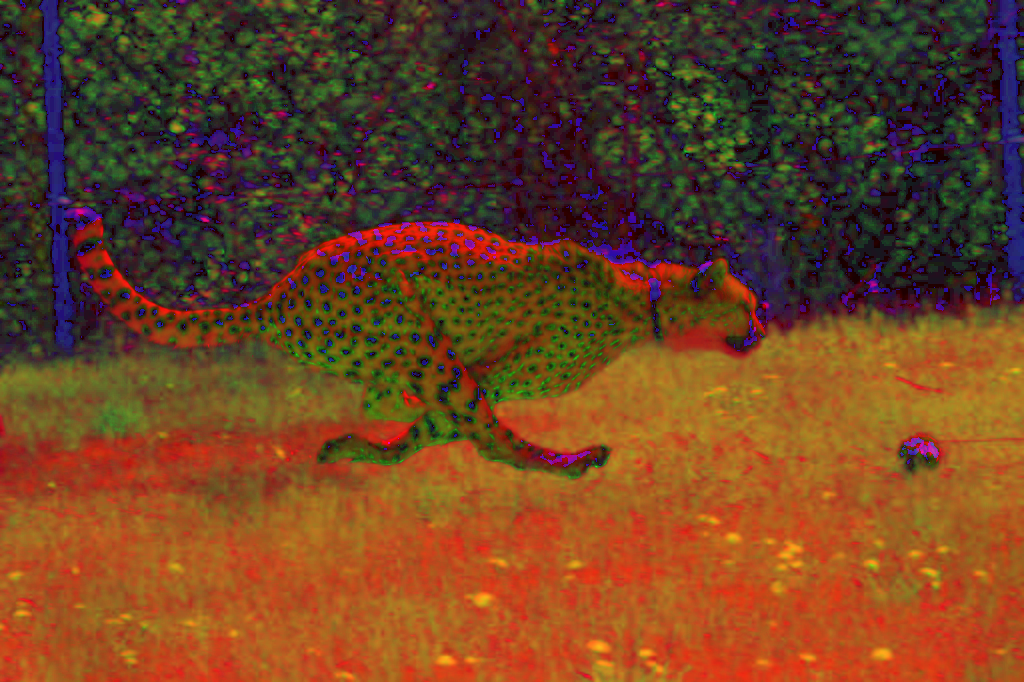

In [5]:
# Tranforma para o sistema HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv_image)

## LAB

* **L :** descreve a leveza da cor, usada de forma intercambiável com intensidade
* **A :** componente de cor variando de verde a magenta
* **B :** componente de cor variando de azul a amarelo

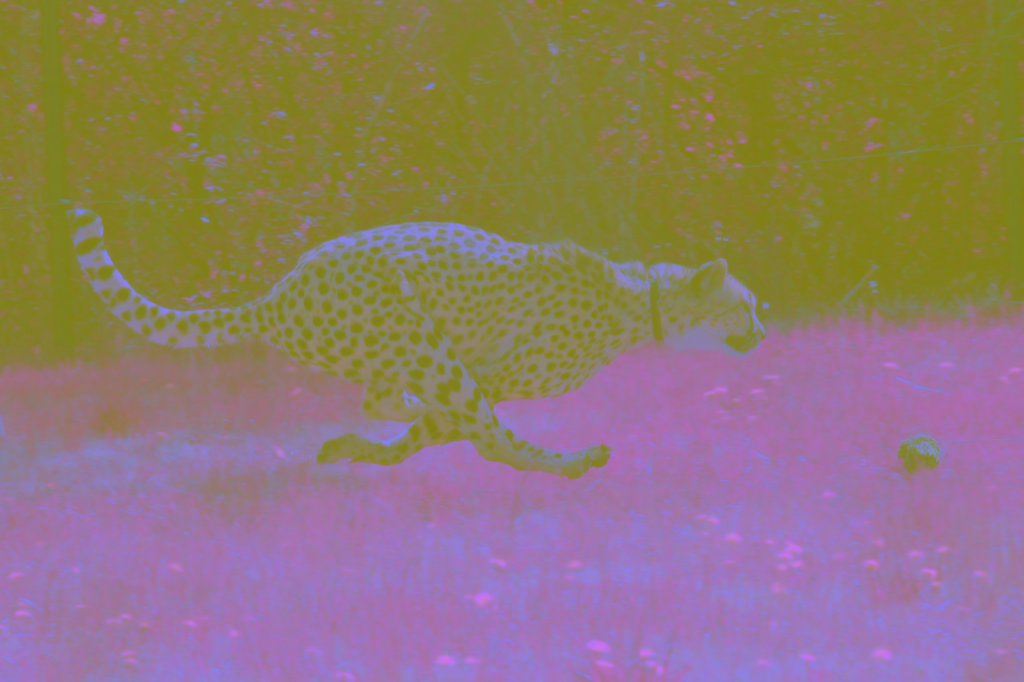

In [6]:
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
cv2_imshow(lab_image)

## YCrCb

* **Y :** luminância obtida do espaço de cor RGB após correção gama
* **Cr :** descreve o quanto o componente vermelho (R) está longe da luminância
* **Cb :** descreve a que distância o componente azul (B) está da luminância

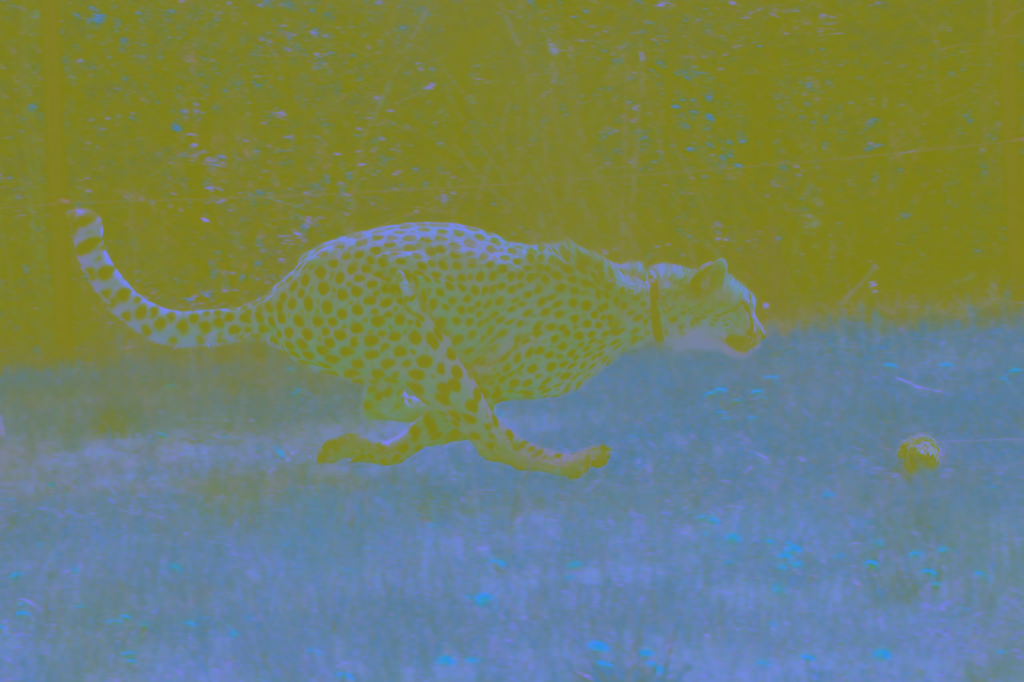

In [7]:
ycrcb_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
cv2_imshow(ycrcb_image)

# Qual canal dentro do espaço de cores domina o conjunto de dados:

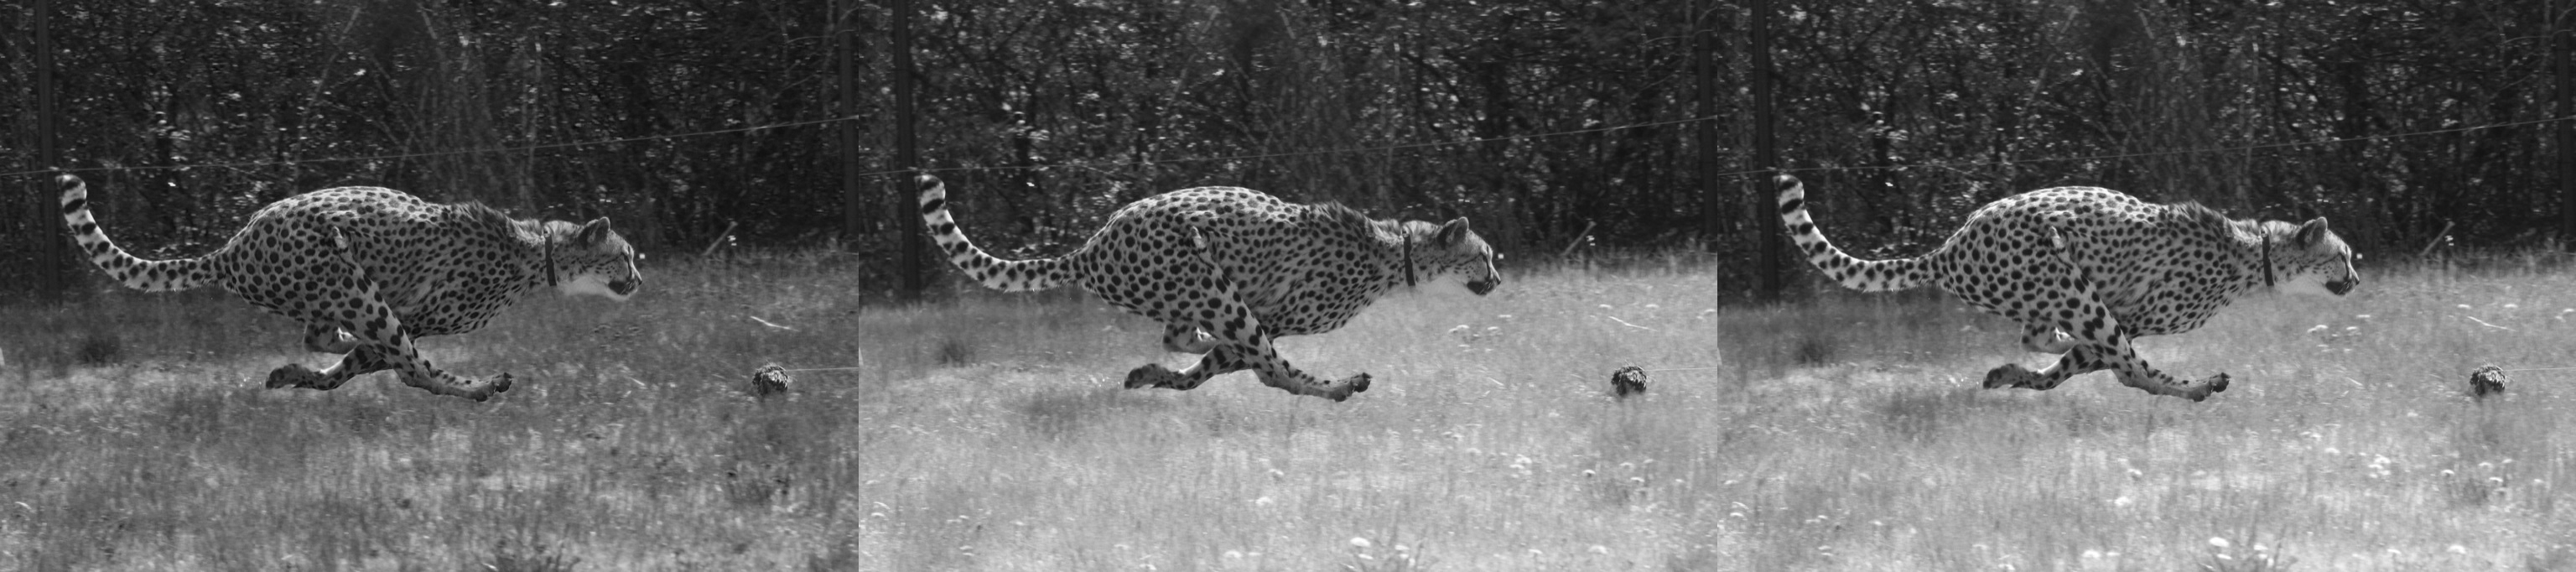

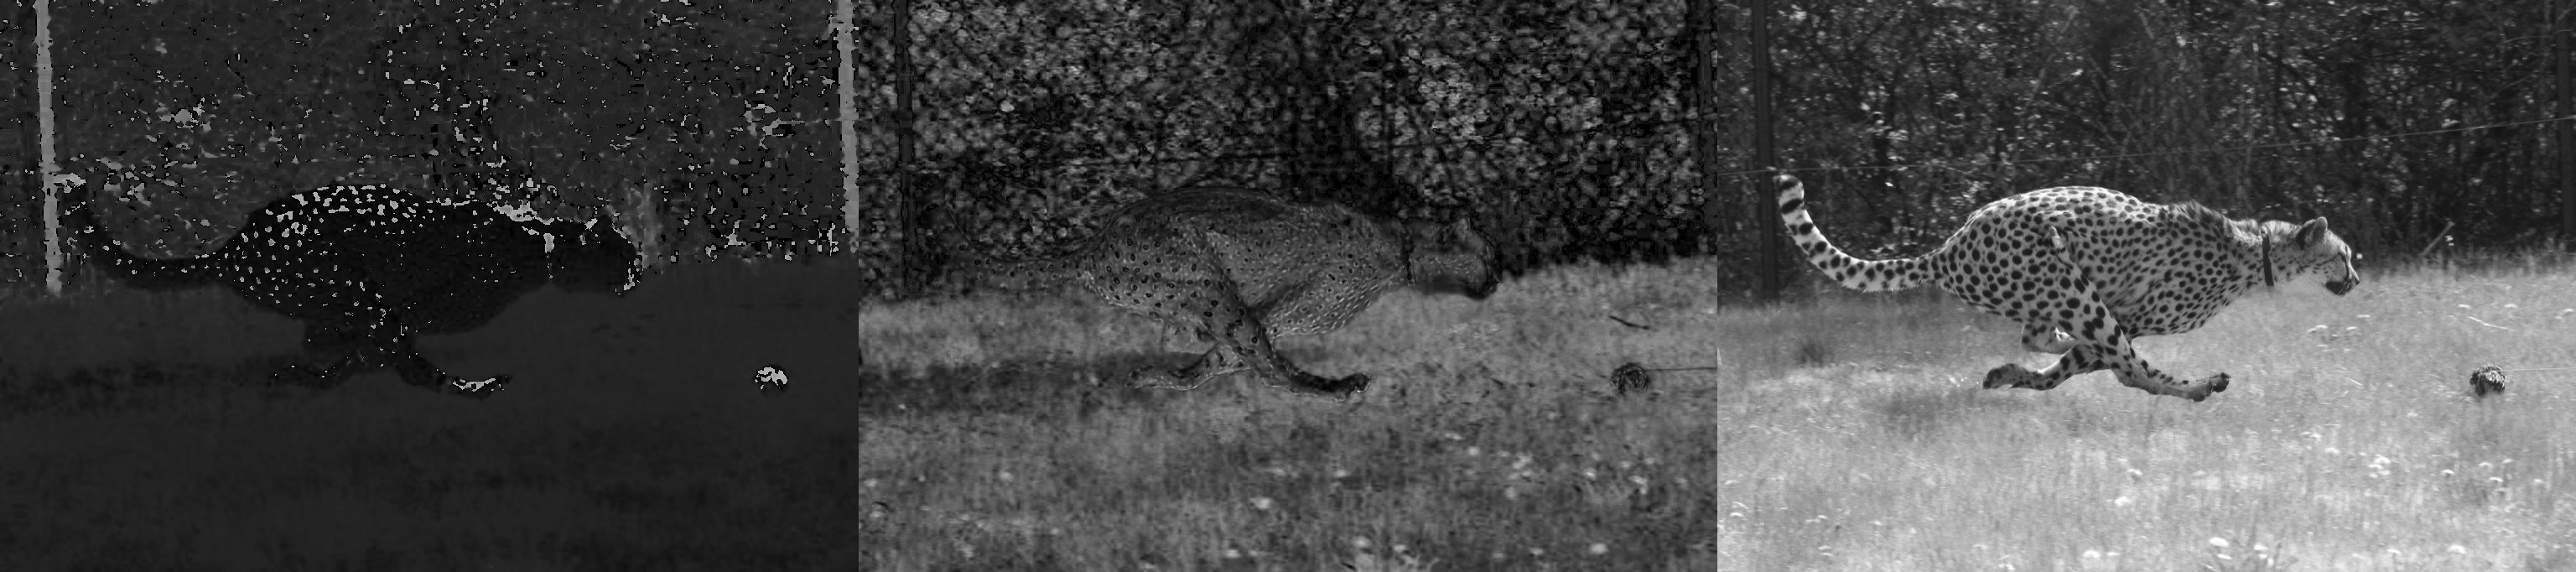

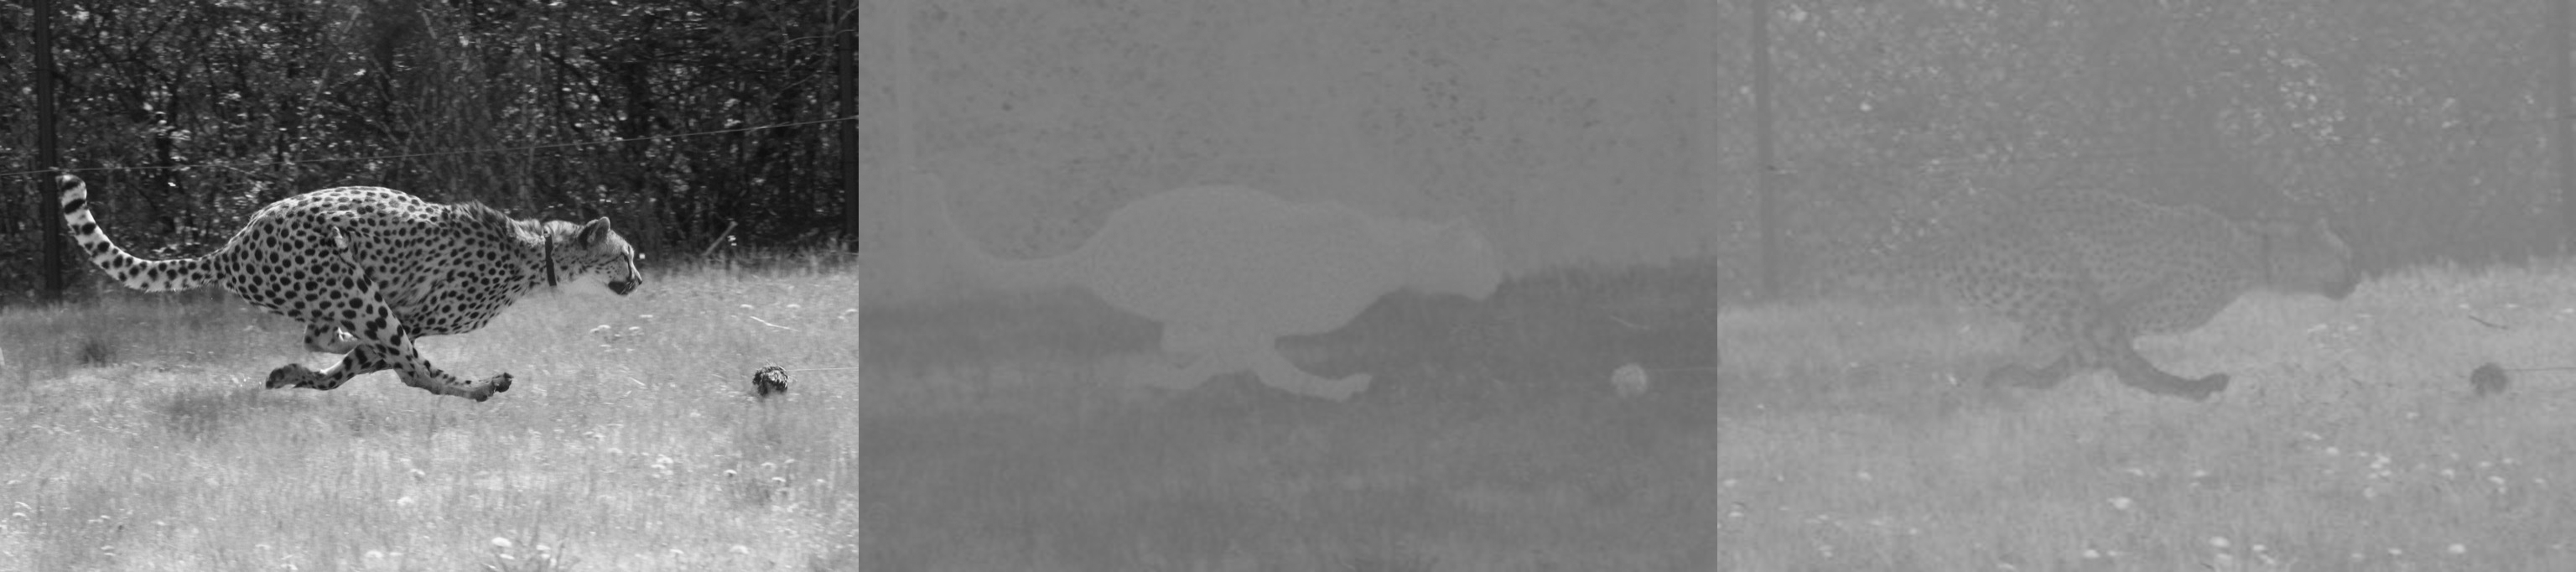

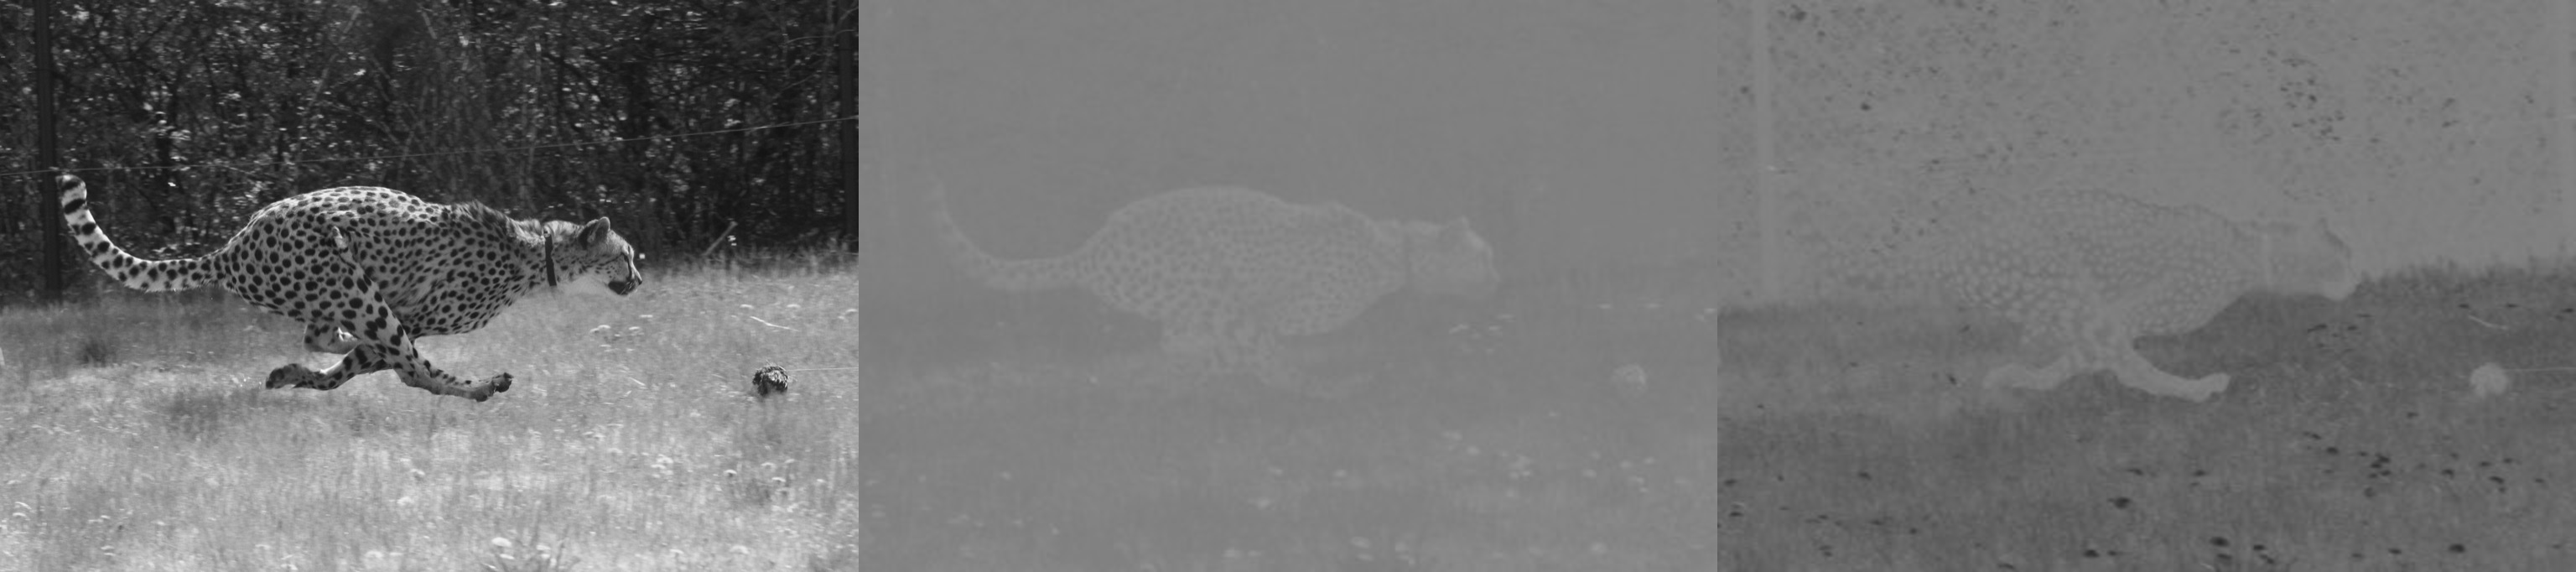

In [25]:
im_split_channels = cv2.split(image)

(canal1, canal2, canal3) = cv2.split(image) #RGB
(canal4, canal5, canal6) = cv2.split(hsv_image) #HSV
(canal7, canal8, canal9) = cv2.split(lab_image) #LAB
(canal10, canal11, canal12) = cv2.split(ycrcb_image) #YCrCb


cv2_imshow(cv2.hconcat([canal1, canal2, canal3]))
cv2_imshow(cv2.hconcat([canal4, canal5, canal6]))
cv2_imshow(cv2.hconcat([canal7, canal8, canal9]))
cv2_imshow(cv2.hconcat([canal10, canal11, canal12]))

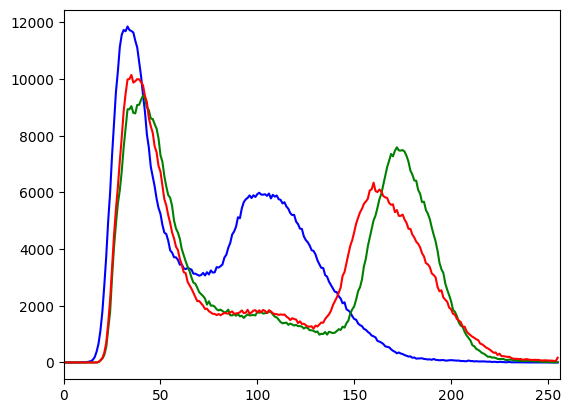

In [20]:
# numero de bins do histograma
hist_size = 256

# faixa de valores de cada canal
hist_range = (0, 256) #0-255 (8 bits)
accumulate = False

color = ('b','g','r') #h, s, v

for i,col in enumerate(color):

    histr = cv2.calcHist(im_split_channels,[i],None, [hist_size], hist_range, accumulate=accumulate)

    plt.plot(histr, color = col)

    plt.xlim([0,256])

    
plt.show()